In [20]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def load_metadata():
    #DATA_URL = "C:\\Users\\o.georgievskiy\\Koch Media GmbH\\Internship - Oleg Georgievskiy - General\\Promo Tracker\\Promo_Old_c.csv"
    #df = pd.read_csv(DATA_URL, delimiter = ";", index_col="Promo_ID")   #check for delimiter in csv or other file format adjust accordingly
    PATH = "C:\\Users\\o.georgievskiy\\Koch Media GmbH\\Internship - Oleg Georgievskiy - General\\Forecasting\\"
    filename = "Data for Arima.csv"     
    df = pd.read_csv(PATH+""+filename, header = 0, skiprows = 2, index_col=0, parse_dates = True)   #check for delimiter in csv or other file format adjust accordingly
    df.columns = df.columns.str.strip()
    return df
    #return df.set_index("Promo ID")

data_df = load_metadata()

filt = (data_df["Net Units Sold"]<0) & (data_df["Gross Units Sold"]>0)
data_df = data_df[~filt].copy()

#Add "Discount anti-rate" (share of original price)
data_df["Discount"] = data_df["Sale Price"]/data_df["Base Price"]
#taking Numerical values by groupby
data_df.columns
#data_df.shape



Index(['Bundle(ID#)', 'Bundle Name', 'Product(ID#)', 'Product Name', 'Type',
       'Game', 'Platform', 'Country Code', 'Country', 'Region',
       'Gross Units Sold', 'Chargeback/Returns', 'Net Units Sold',
       'Base Price', 'Sale Price', 'Currency', 'Gross Steam Sales (USD)',
       'Chargeback/Returns (USD)', 'VAT/Tax (USD)', 'Net Steam Sales (USD)',
       'Tag', 'Discount'],
      dtype='object')

In [21]:
np.insert(data_df.columns,0,"Number")

dsrp = 10
currency = "$"

print (str(dsrp)+currency)


10$


In [27]:
all_values = ["Gross Steam Sales (USD)","Net Steam Sales (USD)",'Net Units Sold','Base Price','Sale Price', 'Discount']
df = data_df.groupby(['Game','Date'])[all_values].sum().reset_index()
print(df.columns)

Index(['Game', 'Date', 'Gross Steam Sales (USD)', 'Net Steam Sales (USD)',
       'Net Units Sold', 'Base Price', 'Sale Price', 'Discount'],
      dtype='object')


In [42]:
import time
games = ["Agents of Mayhem","Saints Row 2"]
%timeit df[~ df.Game.isin(games)]
%timeit df.query("Game != @games")
%timeit df.loc[(df.Game != games)]
%timeit df[df.apply(lambda x:x["Game"]!=games, axis = 1)]


SyntaxError: invalid syntax (<ipython-input-42-c44a50c45fd1>, line 3)

In [24]:
what = "Gross Steam Sales (USD)"
by_what = "Game"
#df.reset_index(inplace = True)
y_val = df[['Date',by_what,what]].set_index(['Date'],append=True)
y_val
games = ["Agents of Mayhem","Saints Row 2"]
data_plot = pd.DataFrame(columns = ["Date",by_what,what])#,index = ["Date"])
print (data_plot)
for game in games:
    #y_val.reset_index(inplace = True)
    data_plot = y_val[y_val.Game.isin([game])].merge(data_plot,how = 'outer',on = "Date")#,axis = 1)


print (data_plot)



Empty DataFrame
Columns: [Date, Game, Gross Steam Sales (USD)]
Index: []
          Date          Game  ...  Game_y Gross Steam Sales (USD)_y
0   2019-01-01  Saints Row 2  ...     NaN                       NaN
1   2019-01-02  Saints Row 2  ...     NaN                       NaN
2   2019-01-03  Saints Row 2  ...     NaN                       NaN
3   2019-01-04  Saints Row 2  ...     NaN                       NaN
4   2019-01-05  Saints Row 2  ...     NaN                       NaN
..         ...           ...  ...     ...                       ...
360 2019-12-27  Saints Row 2  ...     NaN                       NaN
361 2019-12-28  Saints Row 2  ...     NaN                       NaN
362 2019-12-29  Saints Row 2  ...     NaN                       NaN
363 2019-12-30  Saints Row 2  ...     NaN                       NaN
364 2019-12-31  Saints Row 2  ...     NaN                       NaN

[365 rows x 7 columns]


In [ ]:
data_plot.Game.isin(games)

<AxesSubplot:xlabel='Date'>

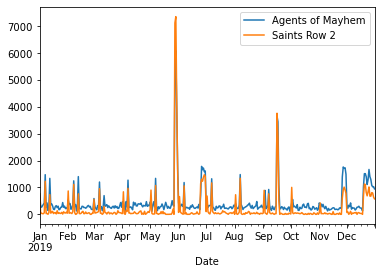

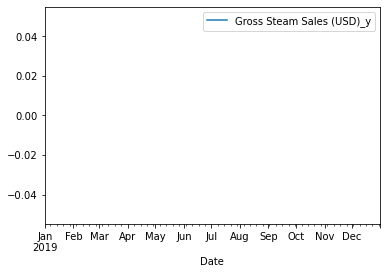

In [8]:
ax = data_plot.plot( x = 'Date', y = ["Gross Steam Sales (USD)","Gross Steam Sales (USD)_x"])
plt.legend(games)
data_plot.plot( x = 'Date', y = "Gross Steam Sales (USD)_y")

In [265]:
def combine_data(df, ind, what,by_what, values):
    #df.reset_index(inplace = True)
    y_val = df[[ind,by_what,what]].set_index([ind],append=True)
    data_plot = pd.DataFrame(columns = [ind,by_what,what])
    for value in values:
        print (value)
        i = 1
        data_plot = y_val[y_val.loc[:,by_what].isin([value])].merge(data_plot,how = 'left',on = ind)
        data_plot.columns.values[i] = "{}_{}".format(what,value)
        data_plot.columns.values[i+1] = "{}_{}".format(by_what,value)
        # data_plot.columns.values[i+1] = "1:{}_{}".format(by_what,value)
    #data_plot.columns = [lambda col,val: "{}-{}".format(col,val) for col in [what,by_what] for val in values] 
    data_plot.set_index("Date",inplace = True)
    return data_plot.iloc[:,:-2]

games = ["Agents of Mayhem","Saints Row 2","Saints Row IV"]
data = combine_data(df,'Date','Gross Steam Sales (USD)','Game',games)
data

Agents of Mayhem
Saints Row 2
Saints Row IV


,Gross Steam Sales (USD)_Saints Row IV,Game_Saints Row IV,Gross Steam Sales (USD)_Saints Row 2,Game_Saints Row 2,Gross Steam Sales (USD)_Agents of Mayhem,Game_Agents of Mayhem
Date,,,,,,
2019-01-01,Saints Row IV,1307.6946,Saints Row 2,757.2721,Agents of Mayhem,747.6725
2019-01-02,Saints Row IV,450.4982,Saints Row 2,327.1596,Agents of Mayhem,37.1000
2019-01-03,Saints Row IV,598.4630,Saints Row 2,260.8211,Agents of Mayhem,38.3235
2019-01-04,Saints Row IV,320.5124,Saints Row 2,317.8641,Agents of Mayhem,25.2409
2019-01-05,Saints Row IV,443.5182,Saints Row 2,377.2413,Agents of Mayhem,22.4900
...,...,...,...,...,...,...
2019-12-27,Saints Row IV,1891.8152,Saints Row 2,1299.9046,Agents of Mayhem,674.5946
2019-12-28,Saints Row IV,1739.4420,Saints Row 2,1080.2993,Agents of Mayhem,806.4212
2019-12-29,Saints Row IV,1465.1868,Saints Row 2,1023.6470,Agents of Mayhem,793.3396


<AxesSubplot:xlabel='Date'>

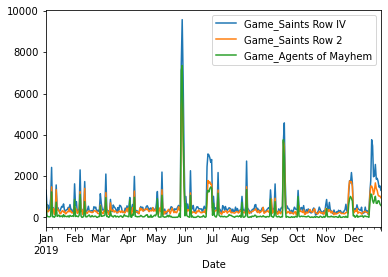

In [267]:
data.plot()

In [ ]:
all_values = ["Gross Steam Sales (USD)","Net Steam Sales (USD)",'Net Units Sold','Base Price','Sale Price', 'Discount']

grouped = data_df[all_values].groupby(["Date"]).sum()
grouped["Average_Discount"] = grouped["Sale Price"]/grouped["Base Price"]
#grouped.reset_index(inplace = True)
print(data_df.head())
print(grouped.shape)
#print(df.head())

In [2]:
# Outliers ['2019-01-28', '2019-03-26', '2019-03-27', '2019-03-30']
filt = grouped["Gross Steam Sales (USD)"]>450000
df = grouped[filt].copy()
df.index
df

,Gross Steam Sales (USD),Net Steam Sales (USD),Net Units Sold,Base Price,Sale Price,Discount,Average_Discount
Date,,,,,,,
2019-01-28,1.153112e+06,1.017122e+06,20924,5356832.90,5129376.37,787.831181,0.957539
2019-03-26,1.072956e+06,9.095657e+05,30643,3642250.62,3438121.92,695.229731,0.943955
2019-03-27,4.866361e+05,3.881934e+05,14811,2528244.82,2051324.32,631.056099,0.811363
2019-03-30,4.535083e+05,3.579936e+05,13725,2858322.10,2304959.46,800.395802,0.806403


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


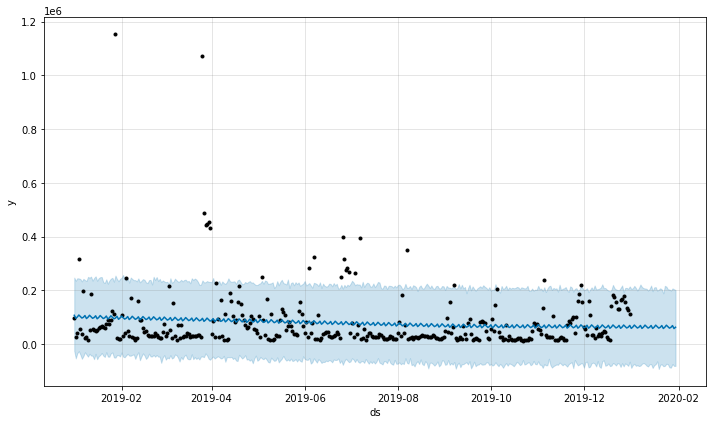

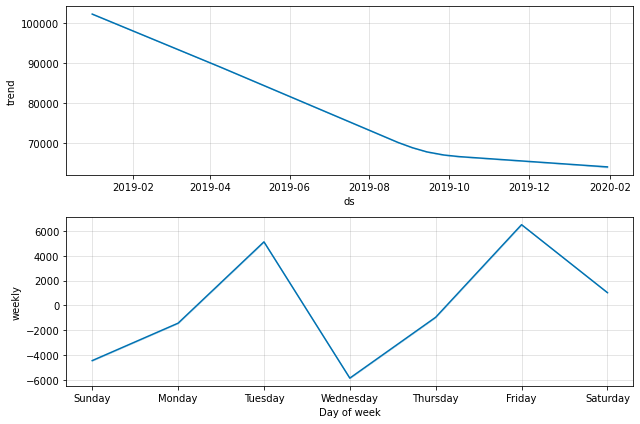

In [3]:
from IPython.display import display
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation, performance_metrics
from fbprophet.plot import add_changepoints_to_plot, plot_cross_validation_metric
from prophet.plot import plot_plotly, plot_components_plotly #important for interactive figure. requires plotly > 4.0


df = grouped.reset_index()
series = df[['Date','Gross Steam Sales (USD)']]
series.rename(columns = {'Date':'ds','Gross Steam Sales (USD)':'y'})
series = series.set_axis(['ds','y'],axis=1)
m = Prophet()
m.fit(series)

future = m.make_future_dataframe(30)
future.tail()

forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()
fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)

#plot_components_plotly(m, forecast)




In [113]:
m = Prophet()
m.fit(series)
cutoffs = pd.to_datetime(['2019-01-28', '2019-03-26', '2019-03-27', '2019-03-30'])
df_cv = cross_validation(m, initial = 60, period = 7, horizon='10', parallel = 'processes', cutoffs = cutoffs)
pm = performance_metrics(df_cv,rolling_window = 0.1)
display (pm.head(),pm.tail())
fig = plot_cross_validation_metric(df_cv.metric, metric = 'mape', rolling_window = 0.1)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x0000029281012E50>


ValueError: Dataframe has no rows.

In [54]:
# df = grouped['Date','Gross Steam Sales (USD)']
df[['Date','Gross Steam Sales (USD)']]
series

# If the trend changes are being overfit (too much flexibility) or underfit (not enough flexibility), 
# you can adjust the strength of the sparse prior using the input argument changepoint_prior_scale. 
# By default, this parameter is set to 0.05. Increasing it will make the trend more flexible:
m = Prophet(changepoint_prior_scale=0.5)
forecast = m.fit(df).predict(future)
fig = m.plot(forecast)



,Date,Gross Steam Sales (USD)
0,2019-01-01,96814.3154
1,2019-01-02,26013.3683
2,2019-01-03,41350.4684
3,2019-01-04,317752.6616
4,2019-01-05,55155.9408
...,...,...
360,2019-12-27,178999.9398
361,2019-12-28,156793.4997
362,2019-12-29,136034.9599
363,2019-12-30,128034.1073


In [11]:
# from prophet.plot import add_changepoints_to_plot
# fig = m.plot(forecast)
# a = add_changepoints_to_plot(fig.gca(), m, forecast)

# # Python
# m = Prophet(changepoints=['2014-01-01'])
# forecast = m.fit(df).predict(future)
# fig = m.plot(forecast)


,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572
...,...,...
2900,2016-01-16,7.817223
2901,2016-01-17,9.273878
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871
